In [7]:
import pandas as pd
import xarray as xr
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [8]:
min_row = 21
min_col = 5
max_row = 25
max_col = 8

file_names = [f"r_{row:02}_c_{col:02}" for row in range(min_row, max_row+1) for col in range(min_col, max_col+1)]

print(len(file_names))

20


In [9]:
# glob all the files in the transposed directory
transposed_directory = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed'
transposed_files = glob.glob(f"{transposed_directory}/*.nc")
transposed_files.sort()
print("{:d} .nc files in {:s}".format(len(transposed_files), transposed_directory))

20 .nc files in /Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed


In [4]:
# Open all the transposed files and combine them into a single dataset by coordinates
# Convert the 'time' coordinate to datetime and store in a new column
ds = xr.open_mfdataset(transposed_files, combine='by_coords')
# ds = ds.where(ds['time'] >= 20030101, drop=True) # DROP ALL DATA PRE-2003
ds['time'] = pd.to_datetime(ds['time'].values, format='%Y%m%d')

In [6]:
# July
# ds_july = ds.sel(time=ds['time.month'] == 7)
# ds_july = ds_july.groupby('time.year').mean('time')
# ds_july_mean = ds_july.mean('year')
# july_chla_data = np.fliplr(ds_july_mean.chla.values)
# july_rotated_data = np.rot90(july_chla_data, 1)


# August
ds_aug = ds.sel(time=ds['time.month'] == 8)
ds_aug_grouped = ds_aug.groupby('time.year').mean('time')
ds_aug_mean = ds_aug_grouped.mean('year')
aug_chla_data = np.fliplr(ds_aug_mean.chla.values)
aug_rotated_data = np.rot90(aug_chla_data, 1)

# September
# ds_sept = ds.sel(time=ds['time.month'] == 9)
# ds_sept = ds_sept.groupby('time.year').mean('time')
# ds_sept_mean = ds_sept.mean('year')
# sept_chla_data = np.fliplr(ds_sept_mean.chla.values)
# sept_rotated_data = np.rot90(sept_chla_data, 1)



In [5]:
ds_aug = ds.sel(time=ds['time.month'] == 8)
ds_aug

<xarray.Dataset>
Dimensions:  (time: 620, x: 200, y: 250)
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
  * time     (time) datetime64[ns] 2003-08-01 2003-08-02 ... 2022-08-31
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(620, 50, 50), meta=np.ndarray>

In [6]:
# write ds_aug to a netcdf file at ../data_files/august_data.nc
ds_aug.to_netcdf('../data_files/august_data_post_2003.nc')

In [ ]:
ds_aug

In [7]:
ds_aug

<xarray.Dataset>
Dimensions:  (x: 200, y: 250, time: 775)
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
  * time     (time) datetime64[ns] 1998-08-01 1998-08-02 ... 2022-08-31
Data variables:
    chla     (time, x, y) float64 dask.array<chunksize=(775, 50, 50), meta=np.ndarray>

In [13]:
# get a list of years from ds_aug
years = ds_aug['time.year'].values
years = np.unique(years).tolist()
# years

### Averae July Chlora

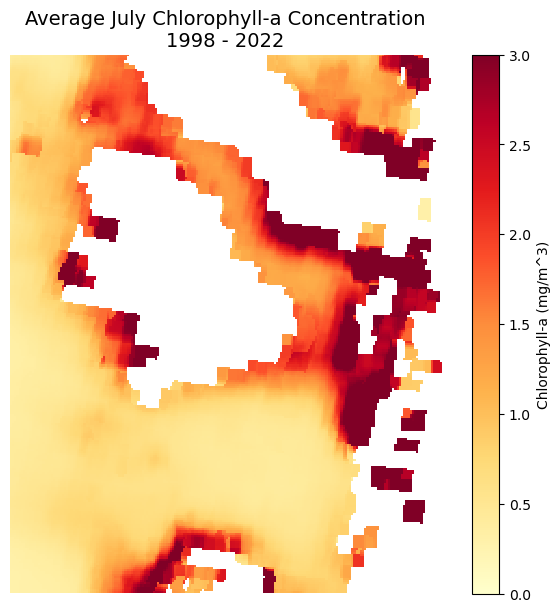

In [63]:
rotated_data = july_rotated_data

# Get the years from the time column 
years = ds_july.year.values

# Create a new figure
plt.figure(figsize=(8, 7))

# Plot a heatmap of the mean chla with bicubic interpolation
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=3, interpolation='none')

plt.title('Average July Chlorophyll-a Concentration\n{:d} - {:d}'.format(years[0], years[-1]), fontsize=14)

# Hide the axes and ticks
plt.axis('off')

# Add a colorbar
plt.colorbar(label='Chlorophyll-a (mg/m^3)')

# Show & close the plot
plt.show()
plt.close('all')

# August mean 1998-2023 vs 2008-2013 or 2018-2023?

In [53]:
# Only keep data that is in august
ds_aug = ds.sel(time=ds['time.month'] == 8)
ds_aug = ds_aug.groupby('time.year').mean('time')

ds_aug_mean_1998_2002 = ds_aug.mean('year')
aug_chla_data_1998_2002 = np.fliplr(ds_aug_mean_1998_2002.chla.values)
aug_rotated_data_1998_2002  = np.rot90(aug_chla_data_1998_2002 , 1)


# get the mean for just years 2008-2023
ds_aug_mean_2008_2023 = ds_aug.sel(year=slice(2008, 2023)).mean('year')
aug_chla_data_2008_2023 = np.fliplr(ds_aug_mean_2008_2023.chla.values)
aug_rotated_data_2008_2023  = np.rot90(aug_chla_data_2008_2023 , 1)

# get the mean for just years 2018-2023
ds_aug_mean_2018_2023 = ds_aug.sel(year=slice(2018, 2023)).mean('year')
aug_chla_data_2018_2023 = np.fliplr(ds_aug_mean_2018_2023.chla.values)
aug_rotated_data_2018_2023  = np.rot90(aug_chla_data_2018_2023 , 1)

In [70]:
ds_aug_mean_2018_2023

<xarray.Dataset>
Dimensions:  (x: 200, y: 250)
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
Data variables:
    chla     (x, y) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>

In [57]:
# get a list of years for ds_aug year=slice(2008, 2023)
years = ds_aug.year.values
# get a list of years for ds_aug year=slice(2018, 2023)
years_2018_2023 = ds_aug.sel(year=slice(2018, 2023)).year.values
years_2018_2023

array([2018, 2019, 2020, 2021, 2022])

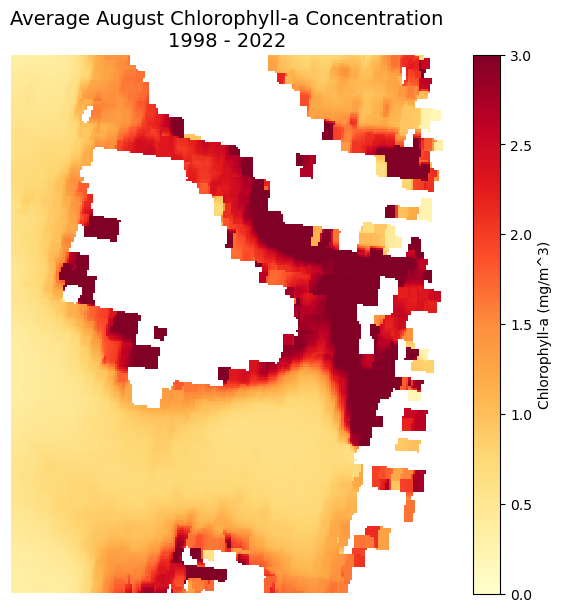

In [64]:
rotated_data = aug_rotated_data_1998_2002

# Get the years from the time column 
years = years_1998_2023

# Create a new figure
plt.figure(figsize=(8, 7))

# Plot a heatmap of the mean chla with bicubic interpolation
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=3, interpolation='none')

plt.title('Average August Chlorophyll-a Concentration\n{:d} - {:d}'.format(years[0], years[-1]), fontsize=14)

# Hide the axes and ticks
plt.axis('off')

# Add a colorbar
plt.colorbar(label='Chlorophyll-a (mg/m^3)')

# Show & close the plot
plt.show()
plt.close('all')

In [60]:
# get a list of years for ds_aug year=slice(2018, 2023)
years_2008_2023 = ds_aug.sel(year=slice(2008, 2023)).year.values
years_2008_2023

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

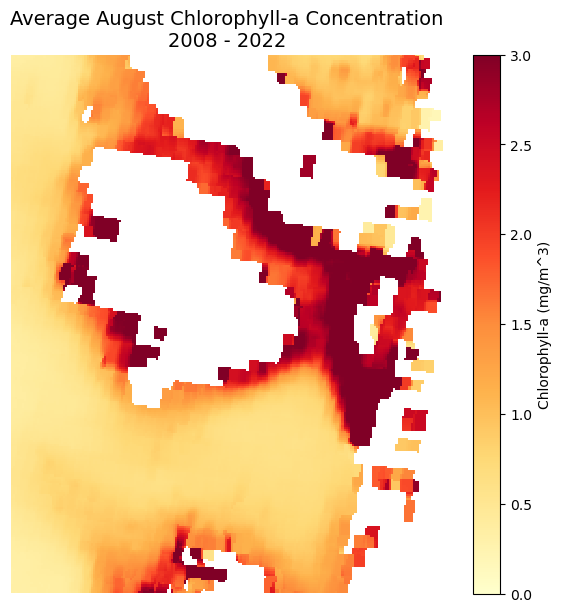

In [65]:
rotated_data = aug_rotated_data_2008_2023

# Get the years from the time column 
years = years_2008_2023

# Create a new figure
plt.figure(figsize=(8, 7))

# Plot a heatmap of the mean chla with bicubic interpolation
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=3, interpolation='none')

plt.title('Average August Chlorophyll-a Concentration\n{:d} - {:d}'.format(years[0], years[-1]), fontsize=14)

# Hide the axes and ticks
plt.axis('off')

# Add a colorbar
plt.colorbar(label='Chlorophyll-a (mg/m^3)')

# Show & close the plot
plt.show()
plt.close('all')

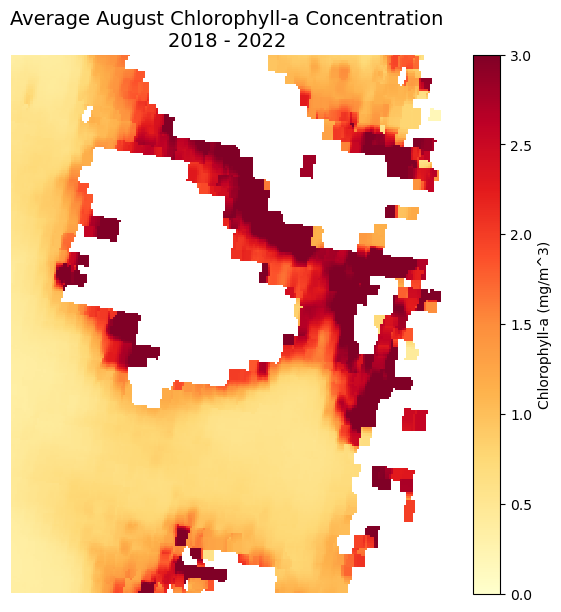

In [66]:
rotated_data = aug_rotated_data_2018_2023
years = ds_aug.sel(year=slice(2018, 2023)).year.values

# Create a new figure
plt.figure(figsize=(8, 7))

# Plot a heatmap of the mean chla with bicubic interpolation
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=3, interpolation='none')

plt.title('Average August Chlorophyll-a Concentration\n{:d} - {:d}'.format(years[0], years[-1]), fontsize=14)

# Hide the axes and ticks
plt.axis('off')

# Add a colorbar
plt.colorbar(label='Chlorophyll-a (mg/m^3)')

# Show & close the plot
plt.show()
plt.close('all')

In [75]:
# Only keep data that is in august
ds_aug = ds.sel(time=ds['time.month'] == 8)
ds_aug = ds_aug.groupby('time.year').mean('time')


# get the mean for just years 2008-2023
ds_aug_mean_2012 = ds_aug.sel(year=slice(2012, 2012)).mean('year')
aug_chla_data_2012 = np.fliplr(ds_aug_mean_2012.chla.values)
aug_rotated_data_2012  = np.rot90(aug_chla_data_2012 , 1)

# get the mean for just years 2018-2023
ds_aug_mean_2019 = ds_aug.sel(year=slice(2019, 2019)).mean('year')
aug_chla_data_2019 = np.fliplr(ds_aug_mean_2019.chla.values)
aug_rotated_data_2019  = np.rot90(aug_chla_data_2019 , 1)



In [76]:
ds_aug.sel(year=slice(2012, 2012)).year.values

array([2012])

In [68]:
ds_aug_mean_2012

<xarray.Dataset>
Dimensions:  (x: 200, y: 250)
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
Data variables:
    chla     (x, y) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>

In [69]:
ds_aug_mean_2019

<xarray.Dataset>
Dimensions:  (x: 200, y: 250)
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
Data variables:
    chla     (x, y) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>

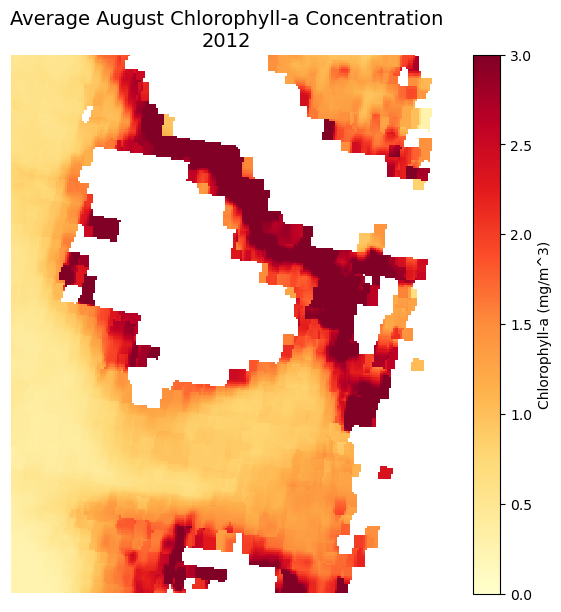

In [77]:
rotated_data = aug_rotated_data_2012
year = 2012

# Create a new figure
plt.figure(figsize=(8, 7))

# Plot a heatmap of the mean chla with bicubic interpolation
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=3, interpolation='none')

plt.title('Average August Chlorophyll-a Concentration\n{:d}'.format(year), fontsize=14)

# Hide the axes and ticks
plt.axis('off')

# Add a colorbar
plt.colorbar(label='Chlorophyll-a (mg/m^3)')

# Show & close the plot
plt.show()
plt.close('all')

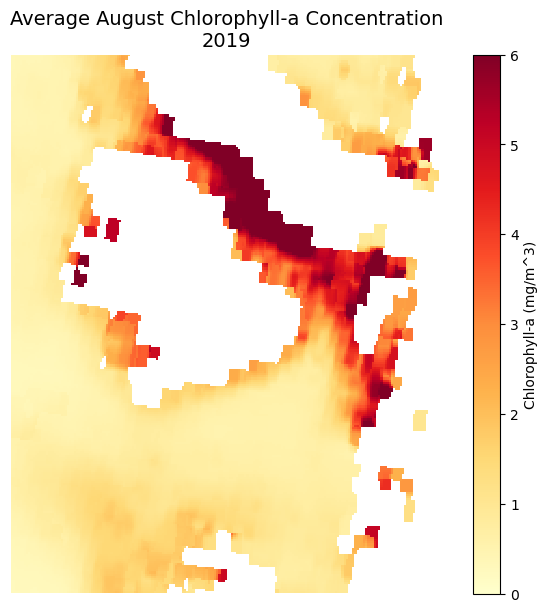

In [81]:
rotated_data = aug_rotated_data_2019
year = 2019

# Create a new figure
plt.figure(figsize=(8, 7))

# Plot a heatmap of the mean chla with bicubic interpolation
plt.imshow(rotated_data, origin='lower', cmap='YlOrRd', vmin=0, vmax=6, interpolation='none')

plt.title('Average August Chlorophyll-a Concentration\n{:d}'.format(year), fontsize=14)

# Hide the axes and ticks
plt.axis('off')

# Add a colorbar
plt.colorbar(label='Chlorophyll-a (mg/m^3)')

# Show & close the plot
plt.show()
plt.close('all')